# Sorting algorithms

### Time vs Array length  
In order to be able to visualize how much time an algorithm requires on different array lengths, let's create a function.

In [22]:
import numpy as np
import time
import matplotlib.pyplot as plt

def time_vs_len(sorting_algorithm):    
    # define list to store time
    times = np.array([])
    lengths = np.array([])
    
    l = 2
    while l < 500:
        # define average time
        avg_time = 0
        
        for i in range(10):
            # create array to run algorithm on
            array = np.random.randint(low=0, high=100000, size=l)

            t1 = time.time()
            sorting_algorithm(array)
            t2 = time.time()
            
            avg_time += (t2 - t1) / 10
        
        times = np.append(times, avg_time)
        lengths = np.append(lengths, l)
        
        # update l
        l += 10
            
    return (lengths, times)

### Insertion sort  
Worst-case performance: O(n^2) - when array is reversed  
Best-case performance: O(n) - when array is already sorted
_________
https://en.wikipedia.org/wiki/Insertion_sort  
https://www.toptal.com/developers/sorting-algorithms/insertion-sort  

In [23]:
def insertion_sort(array):
    # we only need to sort an array if it's has more than 1 elements
    if len(array) > 1:
    
        for j in range(1, len(array)):
            # store element
            key = array[j]

            # get index for previous element
            i = j - 1

            # move i element right if it's greater then j element (key)
            # repeat as long as left element exists
            while array[i] > key and i >= 0:
                array[i + 1] = array[i]
                i -= 1

            array[i + 1] = key

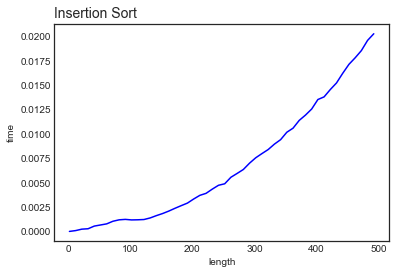

In [24]:
l_insertion, t_insertion = time_vs_len(insertion_sort)

plt.plot(l_insertion, t_insertion, c='blue')
plt.xlabel('length')
plt.ylabel('time')
plt.title('Insertion Sort', loc='left', fontsize=14);

### Selection sort  
Worst-case performance: O(n^2)  
Best-case performance: O(n^2)
_________
https://en.wikipedia.org/wiki/Selection_sort  
https://www.toptal.com/developers/sorting-algorithms/selection-sort

In [25]:
def selection_sort(array):
    # store len of the array as a variable, as we need to call it at least j times (running second for loop)
    array_len = len(array)

    # we only need to sort an array if it's has more than 1 elements
    if len(array) > 1:

        for j in range(array_len):
            min_i = j

            for i in range(j + 1, array_len):
                # check all following elements and update min_i when array[i] is smaller than aaray[j]
                if array[i] < array[min_i]:
                    min_i = i

            # swap j and min_i elements
            array[j], array[min_i] = array[min_i], array[j]

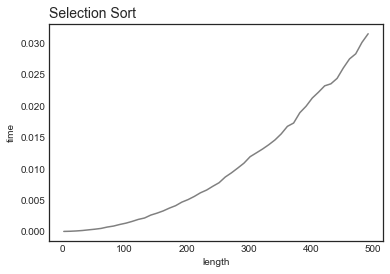

In [26]:
l_selection, t_selection = time_vs_len(selection_sort)

plt.plot(l_selection, t_selection, c='grey')
plt.xlabel('length')
plt.ylabel('time')
plt.title('Selection Sort', loc='left', fontsize=14);

### Bubble sort  
Worst-case performance: O(n^2)  
Best-case performance: O(n)
_________
https://en.wikipedia.org/wiki/Bubble_sort   
https://www.toptal.com/developers/sorting-algorithms/bubble-sort

In [27]:
def bubble_sort(array):
    # store len of the array as a variable, as we need to call it at least j times (running second for loop)
    array_len = len(array)

    # we only need to sort an array if it's has more than 1 elements
    if len(array) > 1:
  
        # repeat n times = array_len
        for j in range(array_len):
            swaps = False

            # check all elements except already checked
            for i in range(array_len - j - 1):

                # swap elements if left element if bigger than the right one
                if array[i] > array[i + 1] :
                    array[i], array[i + 1] = array[i + 1], array[i]
                    swaps = True

            # break if no swaps during whole inner loop
            if swaps == False:
                break

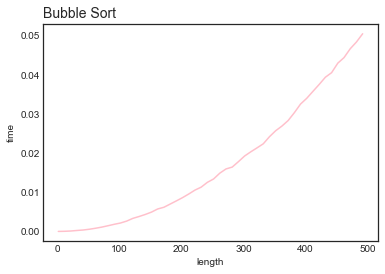

In [28]:
l_bubble, t_bubble = time_vs_len(bubble_sort)

plt.plot(l_bubble, t_bubble, c='pink')
plt.xlabel('length')
plt.ylabel('time')
plt.title('Bubble Sort', loc='left', fontsize=14);

### Merge sort  
Worst-case performance: O(n log n)  
Best-case performance: O(n log n)
_________
https://en.wikipedia.org/wiki/Merge_sort   
https://www.toptal.com/developers/sorting-algorithms/merge-sort  
https://stackabuse.com/merge-sort-in-python  

In [29]:
def merge_sort(array):

    def merge(array, left_index, right_index, middle):
        # create coppies for right and left arrays
        left_copy = array[left_index: middle + 1]
        right_copy = array[middle + 1: right_index + 1]

        # initialize indecies 
        left_copy_index = 0
        right_copy_index = 0
        sorted_index = left_index

        # while elements in both coppies exist
        while left_copy_index < len(left_copy) and right_copy_index < len(right_copy):

            # arrange elements within inecies range
            if left_copy[left_copy_index] <= right_copy[right_copy_index]:
                array[sorted_index] = left_copy[left_copy_index]
                left_copy_index = left_copy_index + 1
            
            else:
                array[sorted_index] = right_copy[right_copy_index]
                right_copy_index = right_copy_index + 1

            # move forward in the sorted part
            sorted_index = sorted_index + 1

        # add remaining elements
        while left_copy_index < len(left_copy):
            array[sorted_index] = left_copy[left_copy_index]
            left_copy_index = left_copy_index + 1
            sorted_index = sorted_index + 1

        while right_copy_index < len(right_copy):
            array[sorted_index] = right_copy[right_copy_index]
            right_copy_index = right_copy_index + 1
            sorted_index = sorted_index + 1

    
    
    def devide_merge(array, left_index, right_index):
        if left_index < right_index:
            middle = (left_index + right_index) // 2
            devide_merge(array, left_index, middle)
            devide_merge(array, middle + 1, right_index)
            merge(array, left_index, right_index, middle)
    
    
    left_index = 0
    right_index = len(array)
    
    if right_index > 1:
        devide_merge(array, left_index, right_index)

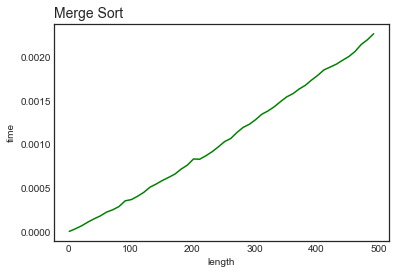

In [30]:
l_merge, t_merge = time_vs_len(merge_sort)

plt.plot(l_merge, t_merge, c='green')
plt.xlabel('length')
plt.ylabel('time')
plt.title('Merge Sort', loc='left', fontsize=14);

## Compare performance

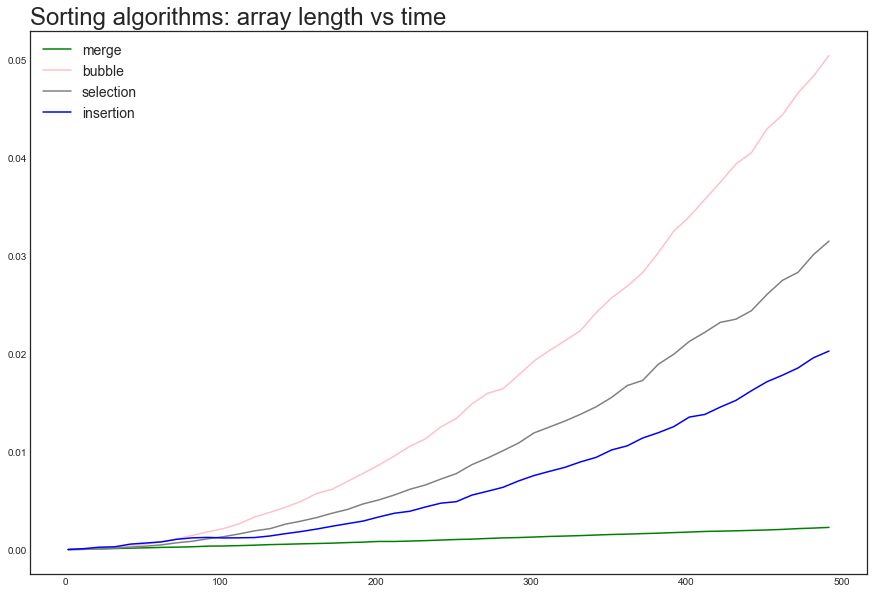

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax.plot(l_merge, t_merge, c='green', label='merge')
ax.plot(l_bubble, t_bubble, c='pink', label='bubble')
ax.plot(l_selection, t_selection, c='grey', label='selection')
ax.plot(l_insertion, t_insertion, c='blue', label='insertion')
plt.title('Sorting algorithms: array length vs time', loc='left', fontsize=24)
plt.legend(fontsize=14)
plt.style.use('seaborn-white');